In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
sys.path.append('../src')
import xgboost as xgb
import pandas as pd
from features.UserJoin import UserJoin
from features.UserJoin import submit, diff, plt_month, plt_day, load_ids, check_f
import config as C
import matplotlib.pyplot as plt
import plotly.express as px


pd.options.display.float_format = '{:,.3f}'.format
pd.options.display.max_columns = None

/opt/conda/envs/miner/lib/python3.8/site-packages/xgboost/compat.py:31: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [3]:
ds = UserJoin()

In [4]:
day = ds.day
C.filter_features(day.columns, type="day")

day = day[C.day_features + ['rq']]

In [7]:
def state(ids):
    ids_33_105 = load_ids('submit_3_3_1.csv')
    s1 = set(ids)
    s2 = set(ids_33_105)

    print('in s1 not s2', len(s1-s2))
    print('in s2 not s1', len(s2-s1))
    print('inner', len(s2 & s1))

-2.159752321981429 25.61857585139319


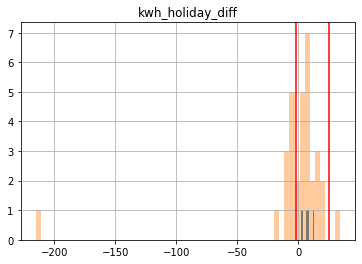

-2.1345201238390104 25.86501547987615


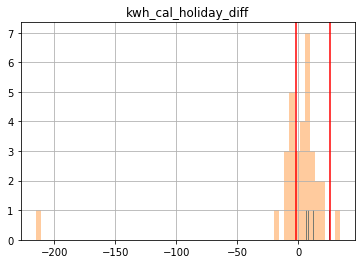

-0.8331269349845201 9.810526315789474


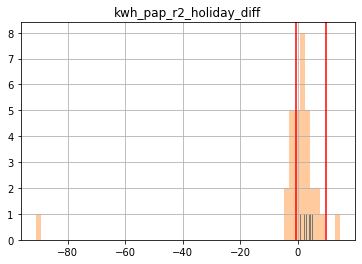

-0.6317337461300312 9.44891640866873


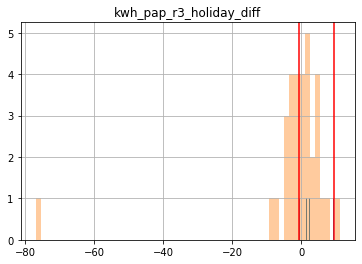

-0.6696594427244591 6.605572755417953


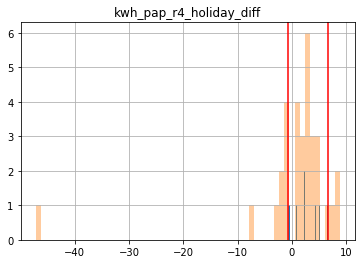

-0.004579009870836426 0.02057615672410673


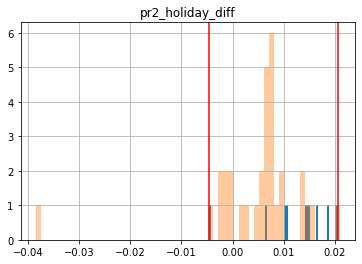

0.0012261364607010217 0.01637992734168059


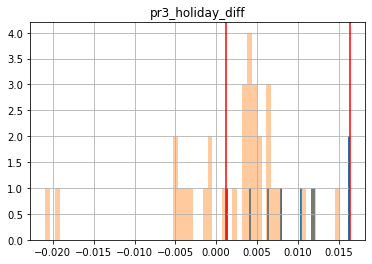

0.0022596022046048048 0.01627742491919587


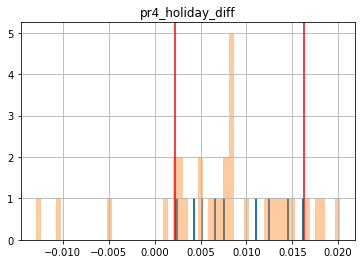

-0.006537065242587932 0.00673228180530468


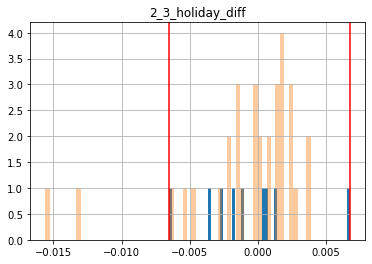

-0.0033405757138079833 0.007163992334546711


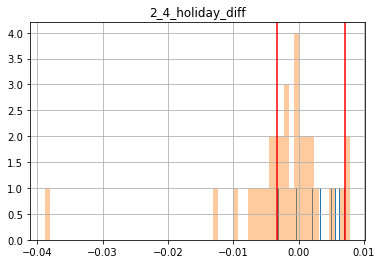

-0.006226637541458285 0.01515307527594971


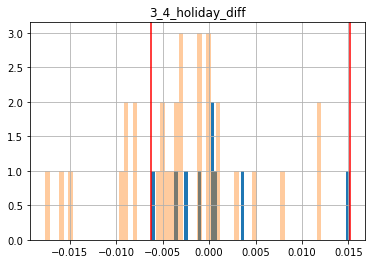

-0.006599135307863636 0.025758320157888454


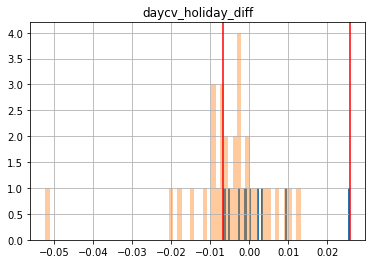

In [23]:
def miner_and_preminer(df, f):
    preids = load_ids(f)
    return df[df.index.isin(C.minerids + list(preids))]


def check_ff(s, df, f, n=2):
    tids = load_ids(f)
    def norm_arr(s):
        return s[((s < (s.mean() + n*s.std())) & (s > (s.mean() - n*s.std())))]
    # norm_arr(df[s]).hist(bins=60, alpha=.4)

    s2 = df[df.index.isin(C.minerids)][s]
    s2.hist(bins=60)
    print(s2.min(), s2.max())

    s3 = df[df.index.isin(tids)][s]
    s3.hist(bins=60, alpha=.4)

    plt.axvline(x=s2.min(), c='r')
    plt.axvline(x=s2.max(), c='r')
    plt.title(s)
    plt.show()

t = ds.train2

obs = [
    'kwh_holiday',
    'kwh_cal_holiday',
    'kwh_pap_r2_holiday',
    'kwh_pap_r3_holiday',
    'kwh_pap_r4_holiday',
    'pr2_holiday',
    'pr3_holiday',
    'pr4_holiday',
    '2_3_holiday',
    '2_4_holiday',
    '3_4_holiday',
    'daycv_holiday',
]
for i in obs:
    check_ff(f'{i}_diff', t, 'submit_3_7_1.csv')



In [26]:
tmp = t[t.index.isin(load_ids('submit_3_7_1.csv'))]
# t = t[t.pr4_holiday_diff < 0].index.values
tmp = tmp[tmp.pr3_holiday_diff < -0].index.values
_ = plt_day(tmp, ds.day)
plt_month(tmp, ds.month)

[ 887227796 1912367373 2071313507 2451165982 2471562086 2741872006
  179569820 2186749200 2347718610 2576321385]


[ 887227796 1912367373 2071313507 2451165982 2471562086 2741872006
  179569820 2186749200 2347718610 2576321385]


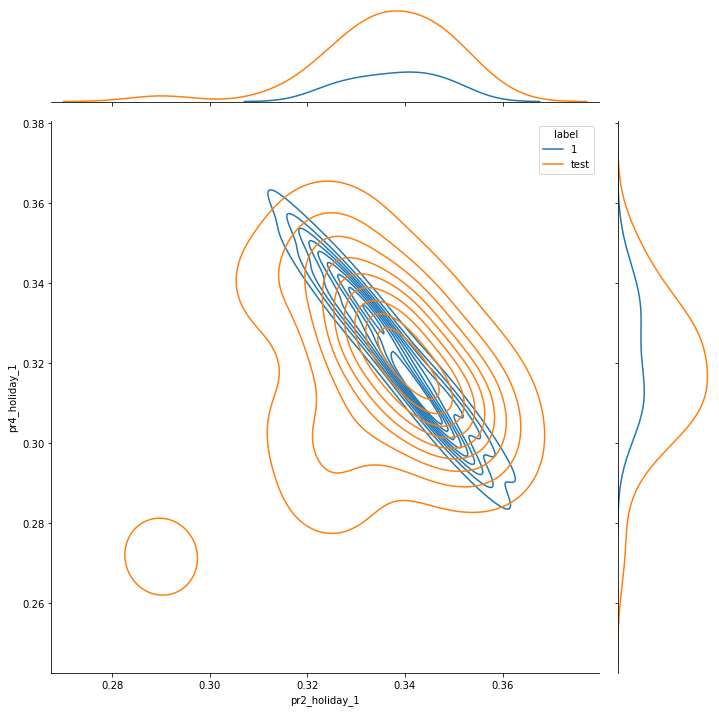

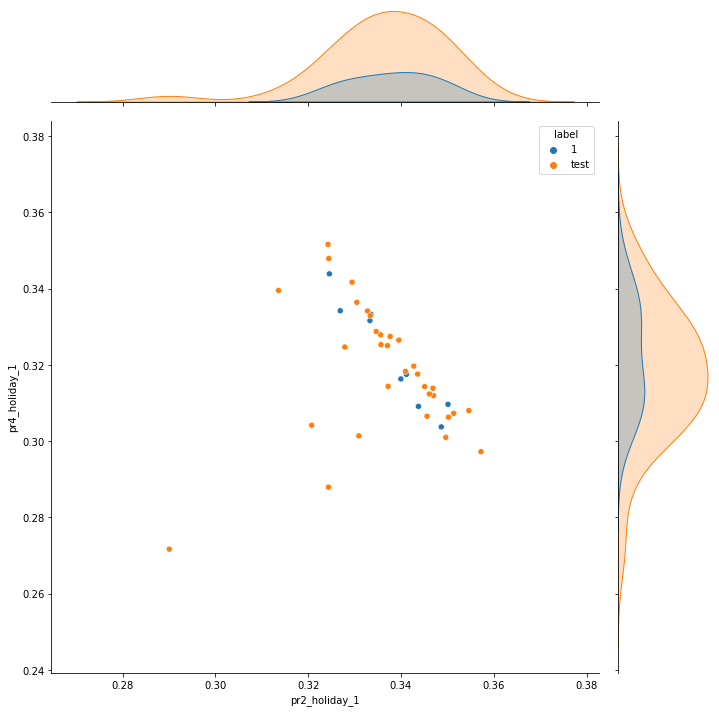

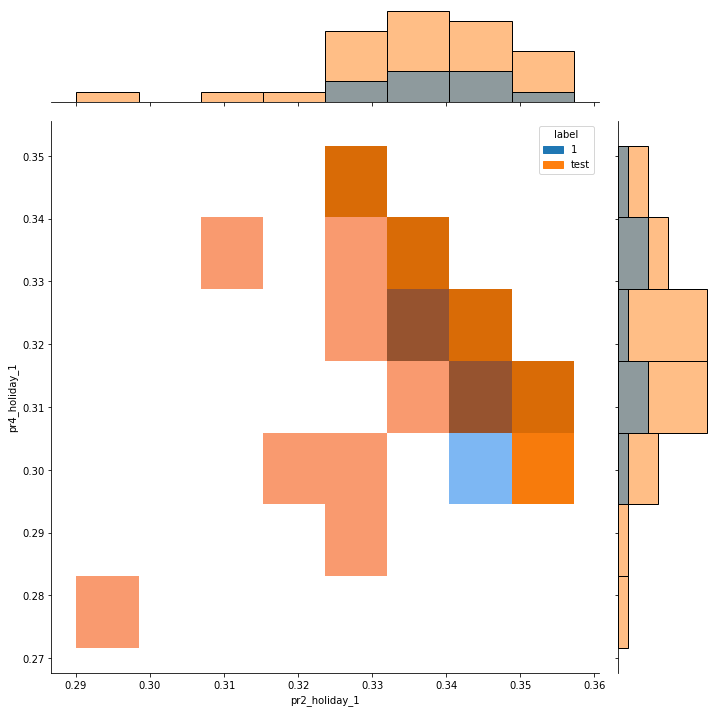

In [161]:
import seaborn as sns
t = miner_and_preminer(ds.train2, 'submit_3_7_1.csv')
# t = ds.train2
sns.jointplot(data = t, x='pr2_holiday_1', y='pr4_holiday_1', hue='label', kind='kde', height=10)
plt.show()

sns.jointplot(data = t, x='pr2_holiday_1', y='pr4_holiday_1', hue='label', height=10)
plt.show()

sns.jointplot(data = t, x='pr2_holiday_1', y='pr4_holiday_1', hue='label', kind='hist', height=10)
plt.show()

(114, 5)


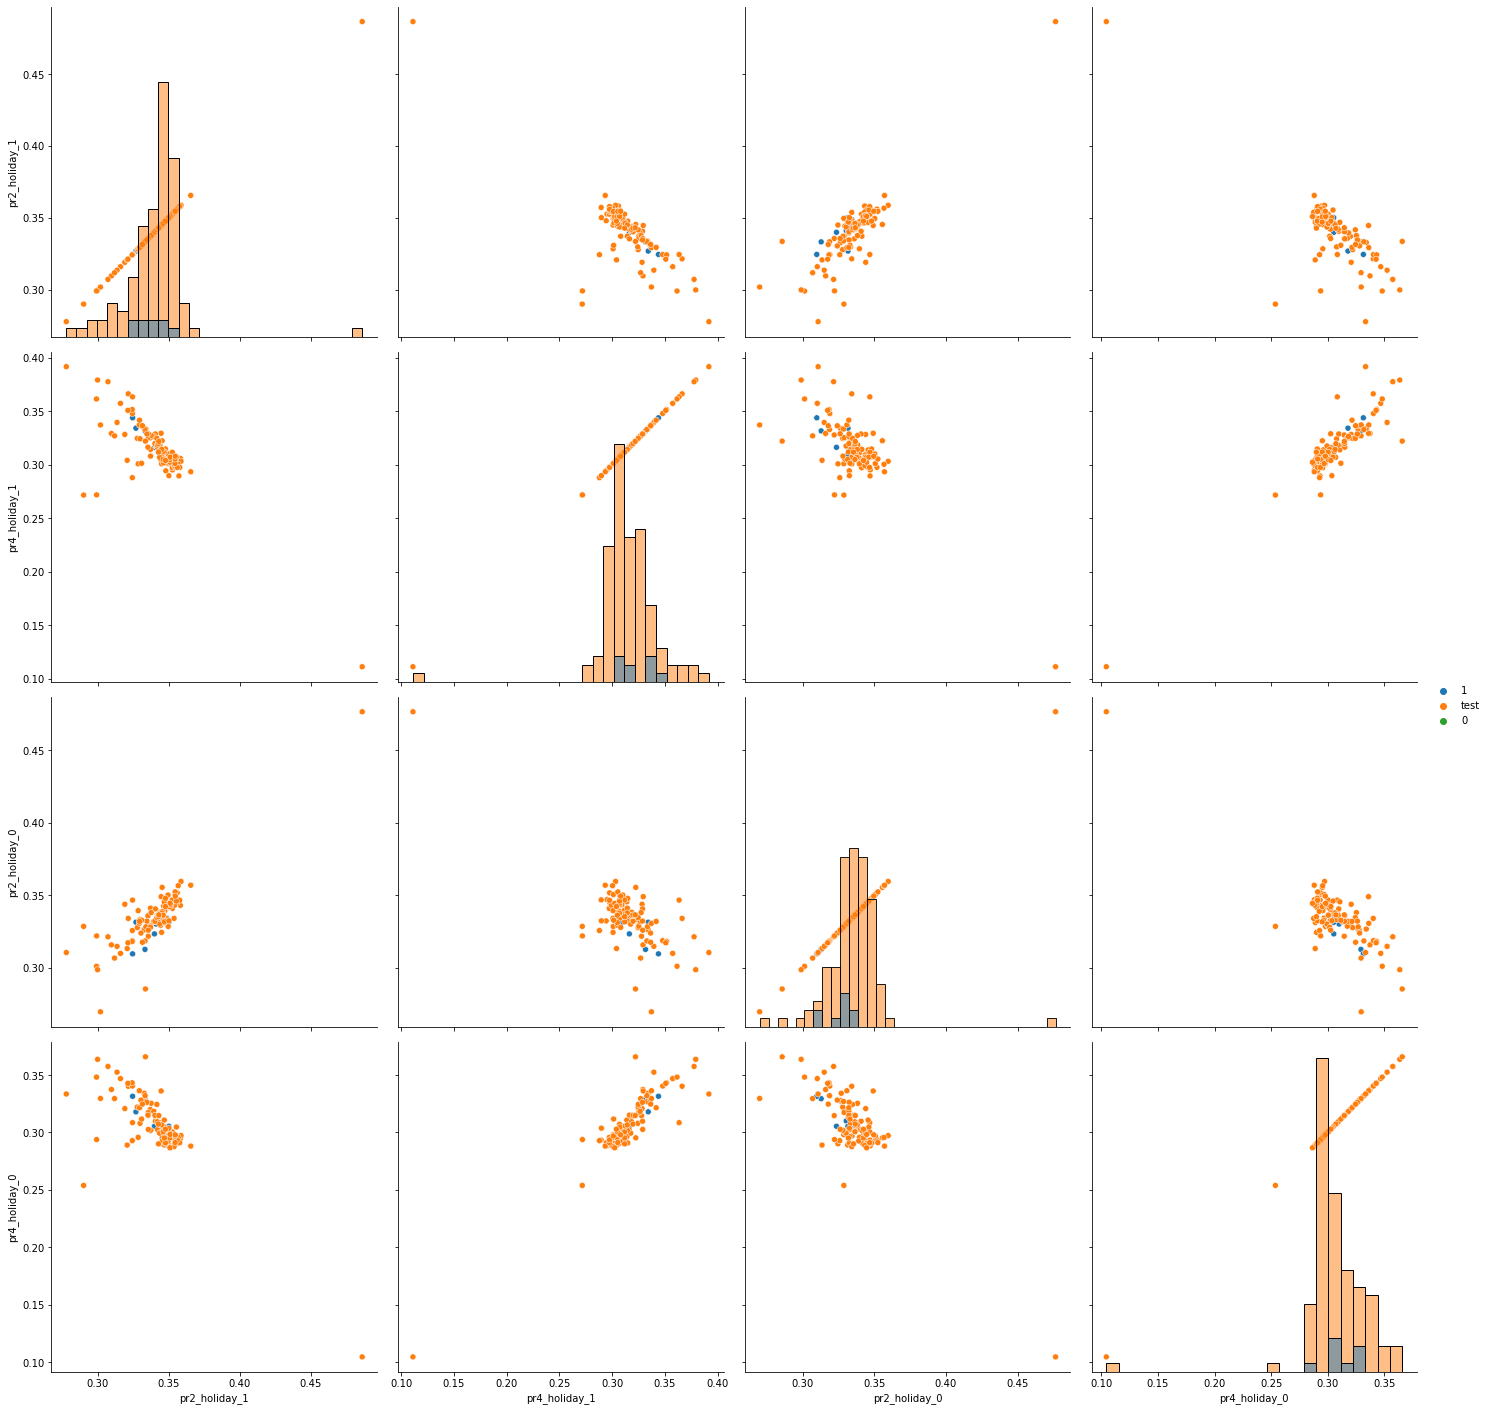

In [246]:
cols = [
    'label',
    'pr2_holiday_1',
    # 'pr3_holiday_1',
    'pr4_holiday_1',
    'pr2_holiday_0',
    # 'pr3_holiday_0',
    'pr4_holiday_0',
    #     'kwh_pap_r3_holiday_0',
    #     'kwh_pap_r2_holiday_0',
    #     'kwh_pap_r3',
        # 'kwh_pap_r2',
        # 'kwh_cal_holiday_0',
        # 'kwh_holiday_0',
        # 'kwh_pap_r2_holiday_1',
        # 'kwh_pap_r3_holiday_1',
        # 'kwh',
    #     'kwh_cal_holiday_1',
    #     'kwh_holiday_1',
    # 'pr4_holiday_0',
    # 'kwh_pap_r4',
    # 'pr4_holiday_1',
]


# miner_and_preminer
t = miner_and_preminer(ds.train2, 'submit_3_3_1.csv')[cols]
print(t.shape)
# t = ds.train2[cols]
g = sns.PairGrid(t, height=5, hue='label', hue_order=['1', 'test', '0'])
g.map_diag(sns.histplot)
g.map(sns.scatterplot)
g.add_legend(title="", adjust_subtitles=True)


In [215]:
# sns.PairGrid(t)
t = ds.train2
t = t.drop(columns=['pq_f',
                    'pq_g',
                    'pq_p',
                    'pq_z',
                    'pp',
                    'pf',
                    'pg',
                    'p_f',
                    'p_g',
                    'f_g',
                    'monthcv',
                    'ELEC_TYPE_NAME_CODE',
                    'VOLT_NAME_CODE'])
t = t[t.label != 'test']

# t.corr()
t['t'] = t.label.astype(int)
't' in t.columns
t.corr()[['t']].sort_values('t')


,t
2_3_holiday_0,-0.312
2_3,-0.311
2_3_holiday_1,-0.293
daycv_holiday_0,-0.293
daycv,-0.274
3_4_holiday_0,-0.257
daycv_holiday_1,-0.251
2_4_holiday_0,-0.248
2_4,-0.242
3_4,-0.238


In [210]:
t.columns

Index(['ELEC_TYPE_NAME', 'VOLT_NAME', 'RUN_CAP', 'label', 'kwh', 'kwh_cal',
       'kwh_pap_r2', 'kwh_pap_r3', 'kwh_pap_r4', 'pr2', 'pr3', 'pr4', '2_3',
       '2_4', '3_4', 'daycv', 'kwh_holiday_1', 'kwh_cal_holiday_1',
       'kwh_pap_r2_holiday_1', 'kwh_pap_r3_holiday_1', 'kwh_pap_r4_holiday_1',
       'pr2_holiday_1', 'pr3_holiday_1', 'pr4_holiday_1', '2_3_holiday_1',
       '2_4_holiday_1', '3_4_holiday_1', 'daycv_holiday_1', 'kwh_holiday_0',
       'kwh_cal_holiday_0', 'kwh_pap_r2_holiday_0', 'kwh_pap_r3_holiday_0',
       'kwh_pap_r4_holiday_0', 'pr2_holiday_0', 'pr3_holiday_0',
       'pr4_holiday_0', '2_3_holiday_0', '2_4_holiday_0', '3_4_holiday_0',
       'daycv_holiday_0', 'kwh_holiday_diff', 'kwh_cal_holiday_diff',
       'kwh_pap_r2_holiday_diff', 'kwh_pap_r3_holiday_diff',
       'kwh_pap_r4_holiday_diff', 'pr2_holiday_diff', 'pr3_holiday_diff',
       'pr4_holiday_diff', '2_3_holiday_diff', '2_4_holiday_diff',
       '3_4_holiday_diff', 'daycv_holiday_diff', 'pq_f', 'pq